# Regression trees

We will start with regression trees, a type of decision tree model that can be used for regression problems.

Watch the 22-minute video below for a visual explanation of regression trees.

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/g9c66TUylZ4?start=41" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[Explaining Regression Trees by StatQuest](https://www.youtube.com/embed/g9c66TUylZ4?start=41), embedded according to [YouTube's Terms of Service](https://www.youtube.com/static?gl=CA&template=terms).
```

## Regression trees for salary prediction

Get ready by importing the APIs needed from respective libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

Set a random seed for reproducibility.


In [ ]:
np.random.seed(2022)

We use the [Hitters dataset](https://github.com/pykale/transparentML/blob/main/data/Hitters.csv) (click to explore) to predict a baseball player's `Salary` based on `Years` (the number of years that the player has played in the major leagues) and `Hits` (the number of hits that the player has made in the major leagues).

Load the dataset and _remove the rows with missing values_. Inspect the first few rows of the dataset.

In [3]:
hitters_url = "/content/Hitters.csv"

hitters_df = pd.read_csv(hitters_url).dropna()
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Take a look at the structure of the dataset.

In [4]:
hitters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

Decision trees typically do not require feature scaling. However, take a look at the distribution of the `Salary` variable on the original scale and on the log scale, via a histogram below. We can see that the distribution of `Salary` is skewed (to the left), and that the log distribution is more symmetric, closer to a bell shape, i.e. the normal/Gaussian distribution that is preferred in many machine learning models. Therefore, we will use the _log-transform_ of `Salary` as the target variable in our regression tree model.

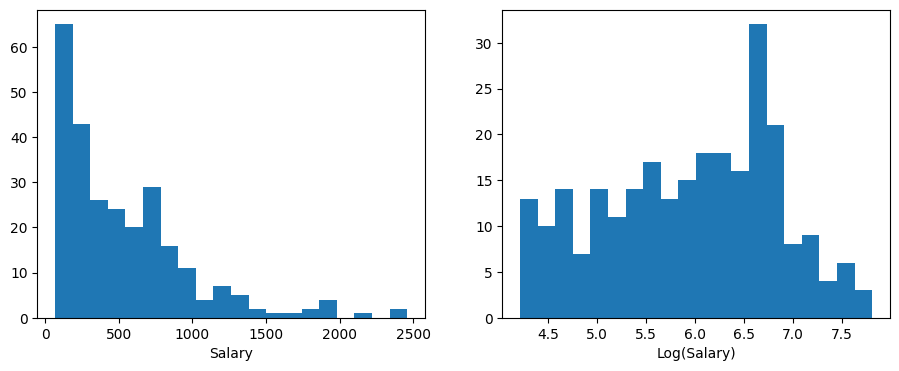

In [5]:
X = hitters_df[["Years", "Hits"]].values
y = np.log(hitters_df["Salary"].values)  # log transform the target variable

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
ax1.hist(hitters_df.Salary.values, bins=20)
ax1.set_xlabel("Salary")
ax2.hist(y, bins=20)
ax2.set_xlabel("Log(Salary)");

Let's fit a regression tree to the data. We will use the `DecisionTreeRegressor` class from the `sklearn.tree` module. We will set the `max_leaf_nodes` hyperparameter to 3, which means that the tree will have at most 3 leaf nodes.

In [6]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

One attractive feature of a tree-based model is visualisation.  Let us visualise the learnt tree using the [`plot_tree` function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) from the `sklearn.tree` module. We will set the `filled` parameter to `True` to colour the leaf nodes according to the predicted value (the larger the value, the darker the colour). We will set the `feature_names` parameter to `['Years', 'Hits']` to label the features.

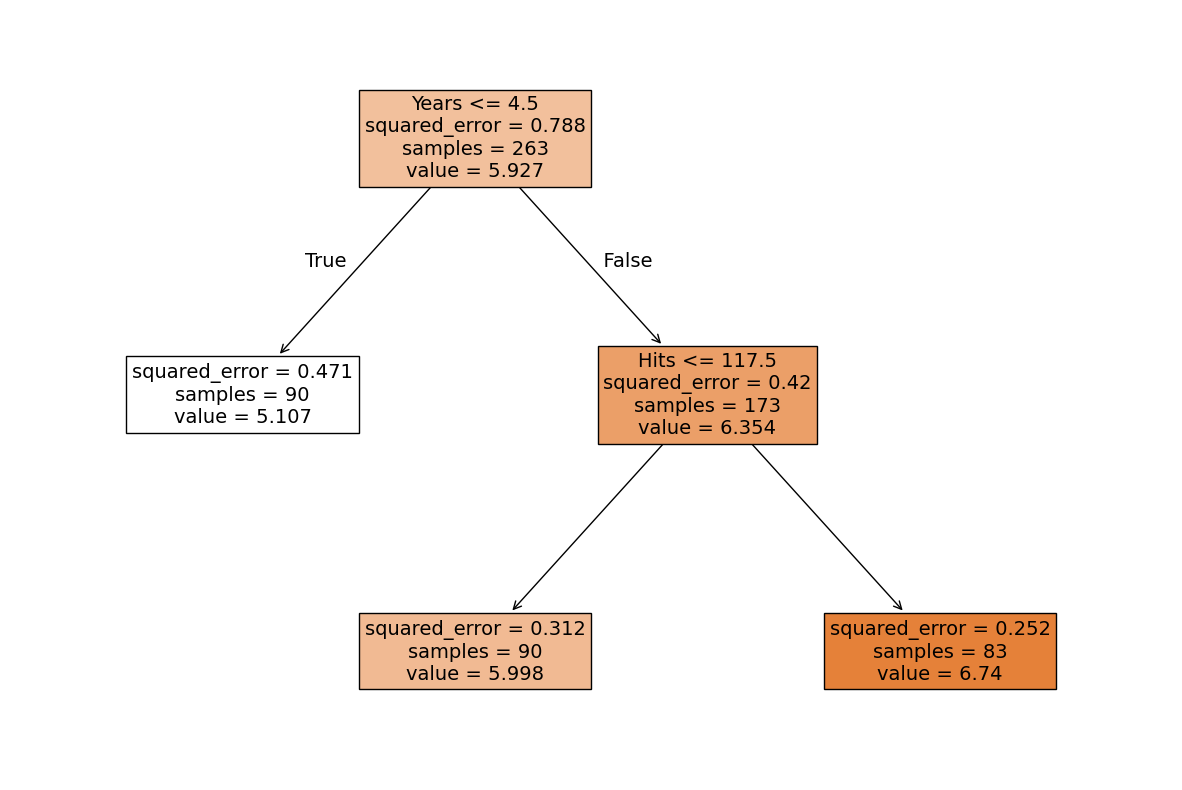

In [7]:
plt.figure(figsize=(15, 10))  # customize according to the size of your tree
plot_tree(regr, filled=True, feature_names=["Years", "Hits"], fontsize=14)
plt.show()

The above depicts a regression tree fitted to the data. The tree has three leaf nodes, and each leaf node corresponds to a region in the feature space. The predicted value for each region is the average value of the `Salary` variable in the training data that falls into that region. We can examine the system logic of this simple regression tree to reveal its system transparency.

```{admonition} System transparency
:class: important

- When `Years` $=5$ and `Hits` $=100$, the predicted `Salary` $=$ \$$1000\times e^{5.998}\approx 403,000$, which can be read out from the tree above by following the right branch from the top first and then the left branch of the next level, reaching the leaf node in the middle.
- To produce an estimated `Salary` of \$$1000\times e^{6.6}\approx 735,095$, we find the leaf node that has a predicted value closest to $6.6$, which is the right most leaf node, and follow the path from that leaf node to the top to get that we should have `Years` $>4.5$ and `Hits` $>117.5$, e.g. `Years` $=5$ and `Hits` $=120$, for a `Salary` closest to \$$735,095$. As we can see here, the estimation from the tree above is quite coarse, and we can get a more accurate estimation by increasing the number of leaf nodes.
```

We can see that this tree consists of a series of splitting rules starting from the top. Each rule is used to divide the feature space into two regions. For example, the first splitting rule is `Years <= 4.5`, which means that if the number of years that a player has played in the major leagues is less than or equal to 4.5, then the player will be assigned to the left child node, with a predicted salary of \$$1000\times e^{5.107}\approx 165,000$. Otherwise, the player will be assigned to the right child node. The second splitting rule is `Hits <= 117.5`, which means that if the number of hits that a player has made in the major leagues is less than or equal to  117.5 then the player will be assigned to the left child node, with a predicted salary of \$$1000\times e^{5.998}\approx 403,000$. Otherwise, the player will be assigned to the right child node, with a predicted salary of \$$1000\times e^{6.740}\approx 845,000$.

```{admonition} How to interpret this tree?
:class: tip, dropdown
From the above, `Years` is the most important factor (among two factors considered) in determining Salary, and players with less experience earn lower salaries than more experienced players. Given that a player is less experienced, the number of hits that he made in the previous year seems to play little role in his salary. But among players who have been in the major leagues for five or more years, the number of hits made in the previous year does affect salary, and players who made more hits last year tend to have higher salaries.
```

Thus, the tree is a piecewise linear function of the features. The predicted value for a new data point is the average value of the `Salary` variable in the training data that falls into the region that the new data point falls into. It is easier to interpret, and has a nice graphical representation.

We can further visualise the tree by plotting the regions in the feature space.

In [ ]:
hitters_df.plot("Years", "Hits", kind="scatter", color="orange", figsize=(7, 6))
plt.xlim(0, 25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate("R1", xy=(2, 117.5), fontsize="xx-large")
plt.annotate("R2", xy=(11, 60), fontsize="xx-large")
plt.annotate("R3", xy=(11, 170), fontsize="xx-large");

```{admonition} How to interpret this plot?
:class: tip, dropdown
Thus, the tree divides the feature space into tree regions: R1, R2, and R3. The first region R1 is the region where the number of years that a player has played in the major leagues is less than or equal to 4.5. The second region R2 is the region where the number of years that a player has played in the major leagues is greater than 4.5, and the number of hits that a player has made in the major leagues is less or equal to 117.5. The third region R3 is the region where the number of years that a player has played in the major leagues is greater than 4.5, and the number of hits that a player has made in the major leagues is greater than 117.5.
```

Decision trees are typically drawn upside down, with the _root node_ at the top and the _leaves_ at the bottom. The root node is the first splitting rule, and the leaves are the _terminal nodes_, regions R1, R2, and R3 in this example. The points along the tree where the feature space is divided into two regions are called _internal nodes_ or _splitting nodes_. The splitting rules are the conditions that are used to divide the feature space into two regions. The splitting rules are represented by the lines that connect the internal nodes to the leaves. These lines are called _branches_ and
the splitting rules are also called _decision rules_.

## How to build/learn a regression tree?

How to build (i.e. learn) a regression tree? In other words, how to find $J$ regions best dividing (partitioning) the feature space for prediction? Unfortunately, it is computationally infeasible to consider every possible partition of the feature space into $J$ regions. Instead, again, we take a top-down, greedy approach like in the [stepwise feature selection](https://pykale.github.io/transparentML/06-ftr-select-regularise/feature-select.html#stepwise-selection) that is known as [recursive binary splitting (recursive partitioning)](https://en.wikipedia.org/wiki/Recursive_partitioning).

### Recursive binary splitting

In recursive binary splitting, we start with the entire feature space as the root node (one single region), and then we successively split the feature space into two regions, in $J-1$ steps. In each step $j$, we consider all features and all possible values of the threshold $T_d$ (cutpoint, or splitting point) for each feature $x_d$, and then choose the feature and threshold such that if using it to split one of the existing $j$ regions, the resulting tree has the lowest cost (best performance). In other words, the splitting rule is chosen by finding the the feature $j$ out of a total of $D$ features $x_1, \cdots , x_D$, with a threshold $T_j$ that splits one existing region to minimise a _cost function_ (_splitting criterion_). Thus, each step $j$ consists of $D$ sub-steps, one for each feature. In each sub-step $d$, we find the optimal threshold $T_d$ that minimises the cost function for feature $x_d$ after splitting an existing region. Then we choose the $j$th feature $x_j$ (with its optimal threshold $T_j$) that minimises the cost function. The splitting rule for step $j$ is then given by $x_j \leq T_j$.

This recursive binary splitting method is [greedy](https://en.wikipedia.org/wiki/Greedy_algorithm) because at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step, as in [stepwise feature selection](https://pykale.github.io/transparentML/06-ftr-select-regularise/feature-select.html#stepwise-selection). Therefore, it is also susceptible to overfitting.

### Cost function

Cost functions for regression trees can be any performance metric for regression, such as the residual sum of squares (RSS) defined in [simple linear regression](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#estimating-the-coefficients) (Equation {eq}`RSSdef`) or the mean squared error (MSE) defined in [simple linear regression](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2) (Equation {eq}`MSEdef`).

### When to stop splitting?

In regression trees, instead of specifying the number of regions $J$ in advance, we stop splitting using a stopping criteria. The most common stopping criteria is to stop splitting when the number of data points in a region is less than or equal to a pre-specified number $R$ (e.g. 5). This is called _pre-pruning_ or early stopping. Another stopping criteria is to stop splitting when the cost function (or its changes over the last $K$ steps) is less than or equal to a pre-specified number $\epsilon$ (e.g. 0.01). This is called _post-pruning_ or late stopping.

You may refer to the advantages and disadvantages of decision trees and tips on practical use in the [`scikit-learn` documentation](https://scikit-learn.org/stable/modules/tree.html#tree).


## Regression trees for income prediction

Next, let us study the [Boston dataset](https://github.com/pykale/transparentML/blob/main/data/Boston.csv)  (click to explore). In this dataset, we want to predict the median value of owner-occupied homes in $1000s in Boston, based on 13 features (predictors) such as crime rate, average number of rooms per dwelling, and proportion of non-retail business acres per town.

Load the dataset and inspect the first few rows of the dataset.



In [9]:
boston_url = "https://github.com/pykale/transparentML/raw/main/data/Boston.csv"

boston_df = pd.read_csv(boston_url)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Take a look at the structure of the dataset.



In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Split the dataset into training (50%) and test sets and fit a regression tree.

In [11]:
X2 = boston_df.drop("medv", axis=1)
y2 = boston_df.medv
train_size = 0.5
max_depth = 3

X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=train_size)
regr_tree = DecisionTreeRegressor(max_depth=max_depth)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

Visualise the tree.

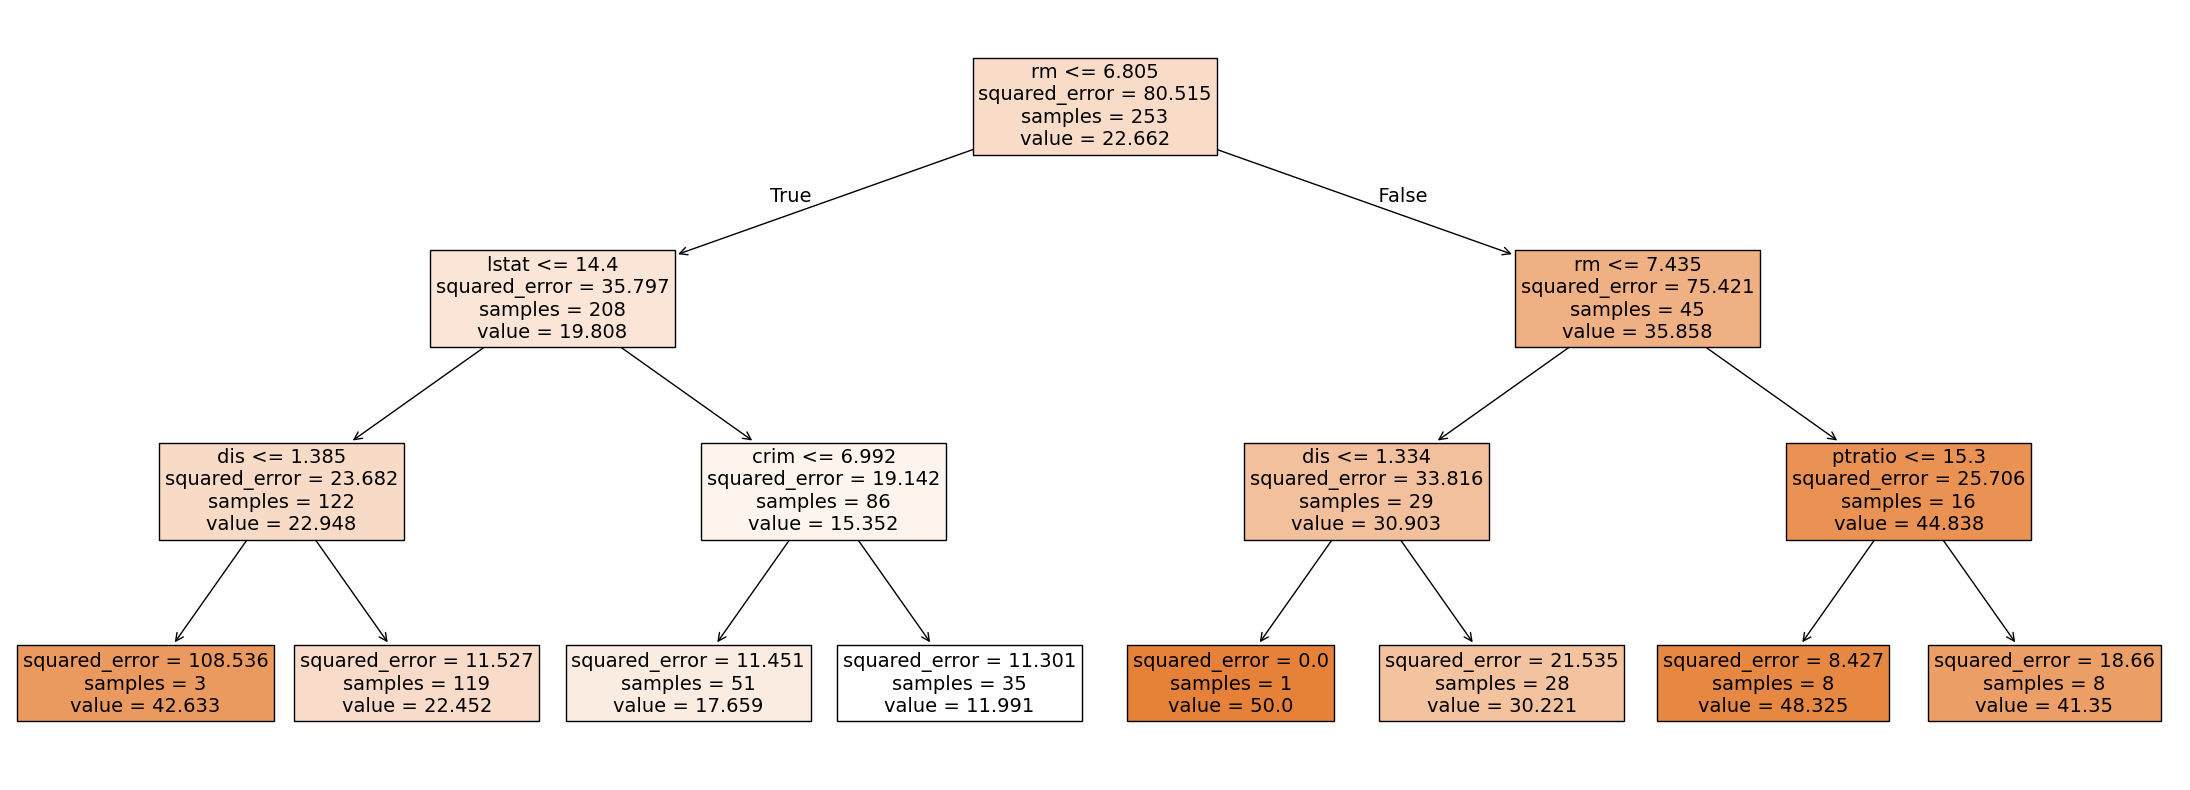

In [12]:
plt.figure(figsize=(28, 10))  # customize according to the size of your tree
plot_tree(regr_tree, filled=True, feature_names=X2.columns, fontsize=14)
plt.show()

Compute the test set MSEs.



In [13]:
y_pred = regr_tree.predict(X_test)
print(mean_squared_error(y_test, y_pred))

25.105445498903272
